<a href="https://colab.research.google.com/github/sixth-group/project2/blob/main/Project_2_of_the_Quera_Data_Science_Bootcamp_(Problem_2_NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
  <img src="https://www.johnsnowlabs.com/wp-content/uploads/2023/08/img_blog-1.jpg" width=500>
</div>

# Outline <a class="anchor" id="Outline"></a>

* [Sentiment Analysis of Comments](#scrollTo=u8xbA8hLYtTR)
  * [Reading and Checking the Train Dataset](#scrollTo=Q8c2QyBeRVWK)
  * [Reading and Checking the Test Dataset](#scrollTo=fIqZoSoJRhuR)
  * [Reading and Checking the ``title_brand`` Dataset](#scrollTo=zBYz2umnWHkX)
  * [Part 1) Preliminary Analysis of Data](#scrollTo=iE9KIVV7ZEvK)
    * [Question 1](#scrollTo=h8s437u14hqt)
    * [Question 2](#scrollTo=IvRASsZC4ts9)
    * [Question 3](#scrollTo=t-YZvZuw41xx)
    * [Question 4](#scrollTo=VVv399074_EQ)
      * [Original Mode](#scrollTo=pPtyI_tZEmm2)
      * [Filtered Mode (Exclude Outlier Data)](#scrollTo=3F6y8nHIE97B)
    * [Question 5](#scrollTo=O44K_ONFIbM4)
    * [Question 6](#scrollTo=khQgPamaqliY)
  * [Part 2) The Level of Satisfaction with a Particular Aspect](#scrollTo=aYYfOiykzLk7)
    * [Approach 1 (``word2vec``)](#scrollTo=Ji9-EYK2COKj)
    * [Approach 2 (``edit_distance``)](#scrollTo=AJGep3GtdPZ-)
  * [Part 3) Sentiment Analysis Model](#scrollTo=7G5t6hEcCaiv)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h1>فهرست مطالب</h1>
    <ul>
      <li>تحلیل احساس نظرات</li>
        <ul>
          <li>خواندن و بررسی مجموعه داده‌ی آموزشی</li>
          <li>خواندن و بررسی مجموعه داده‌ی آزمون</li>
          <li>خواندن و بررسی مجموعه داده‌ی <code>title_brand</code></li>
          <li>بخش ۱) &nbspتجزیه و تحلیل اولیه از داده‌ها</li>
          <ul>
            <li>سوال ۱</li>
            <li>سوال ۲</li>
            <li>سوال ۳</li>
            <li>سوال ۴</li>
            <ul>
              <li>حالت اصلی</li>
              <li>حالت فیلترشده (حذف داده‌های پرت)</li>
            </ul>
            <li>سوال ۵</li>
            <li>سوال ۶</li>
          </ul>
          <li>بخش ۲) &nbspمیزان رضایت از یک جنبه‌ی مشخص</li>
          <ul>
            <li>رویکرد ۱ (<code>Word2Vec</code>)</li>
            <li>رویکرد ۲ (<code>edit_distance</code>)</li>
          </ul>
          <li>بخش ۳) مدل تحلیل احساسات
        </ul>
    </ul>
  </div>
</details>

# Sentiment Analysis of Comments <a class="anchor" id="sentiment_analysis_of_comments"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h1>تحلیل احساس نظرات</h1>
  </div>
</details>

In [1]:
!pip install black[jupyter] --quiet
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!black /content/drive/MyDrive/'Colab Notebooks'/'Project 2 of the Quera Data Science Bootcamp (Problem 2 - NLP).ipynb'

All done! ✨ 🍰 ✨
1 file left unchanged.


In [3]:
# import necessary libraries and functions for our work

# basic libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# Machine Learning libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Natural Language Processing (NLP) libraries
import nltk

nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Reading and Checking the Train Dataset <a class="anchor" id="reading_and_checking_the_train_dataset"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>خواندن و بررسی مجموعه داده‌ی آموزشی</h2>
  </div>
</details>

In [4]:
# read the train data
train_data = pd.read_csv(
    "https://drive.google.com/u/0/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&export=download&confirm=t&uuid=1fea11a3-c36e-4fbf-9eac-0f3d8e08efb3&at=AB6BwCCCO86pkLyXIOWCl-MTnZZh:1698996303307",
    low_memory=False,
)
# show the train data
train_data

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
...,...,...,...,...,...,...,...,...,...,...,...
838939,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800
838940,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000
838941,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400


In [5]:
# getting a general information from the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838742 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838869 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In this dataset, there are two numeric columns of ``int64`` data type. In order to reduce memory consumption, we first take the minimum and maximum values in these columns to limit the data type of these columns if possible.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در این مجموعه داده، دو ستون عددی از نوع <code>int64</code> وجود دارد. به منظور کاهش مصرف حافظه، کمینه و بیشینه مقادیر موجود در این ستون‌ها را می‌گیریم تا در صورت امکان، نوع داده‌ای این ستون‌ها را محدود کنیم
    </p>
  </div>
</details>

In [6]:
print(
    "minimum and maximum value of the overall column:",
    (train_data["overall"].min(), train_data["overall"].max()),
)
print(
    "minimum and maximum value of the unixReviewTime column:",
    (train_data["unixReviewTime"].min(), train_data["unixReviewTime"].max()),
)

minimum and maximum value of the overall column: (1, 5)
minimum and maximum value of the unixReviewTime column: (1451606400, 1538524800)


All the data of the ``overall`` column are between $1$ and $5$, so the data type ``int8`` is sufficient for the values of this column. On the other hand, all the data in the ``unixReviewTime`` column is between $1451606400$ and $1538524800$, so the ``int32`` data type is sufficient for the values of this column. So, in order to reduce the memory consumption, we change the data type of these two columns and make them more limited.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      تمام داده‌های ستون <code>overall</code> بین $1$ و $5$ قرار دارند، بنابراین نوع داده‌ای <code>int8</code> برای مقادیر این ستون کافی است. از طرف دیگر، تمام داده‌های ستون <code>unixReviewTime</code> بین $1451606400$ و $1538524800$ قرار دارند، بنابراین نوع داده‌ای <code>int32</code> برای مقادیر این ستون کافی است. پس به منظور کاهش مصرف حافظه، نوع داده‌ای این دو ستون را تغییر می‌دهیم و آن‌ها را محدودتر می‌کنیم.
    </p>
  </div>
</details>

In [7]:
# (ref: https://github.com/mzhoolideh/KNTU_ML_2023)

# change the data type of the overall column from int64 to int8
train_data["overall"] = train_data["overall"].astype(np.int8)
# change the data type of the unixReviewTime column from int64 to int32
train_data["unixReviewTime"] = train_data["unixReviewTime"].astype(np.int32)

On the other hand, the ``reviewTime`` column indicates the date of the review, whose data type is ``object`` in the dataset, while the data in this column is some dates and must be of ``datetime`` type.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      از طرف دیگر، ستون <code>reviewTime</code>، تاریخ بازبینی را نشان می‌دهد که نوع داده‌ای آن در مجموعه داده، از نوع <code>object</code> است، در حالی که داده‌های این ستون، تعدادی تاریخ هستند و باید از نوع <code>datetime</code> باشند.
    </p>
  </div>
</details>

In [8]:
# (ref: https://saturncloud.io/blog/converting-object-column-in-pandas-dataframe-to-datetime-a-data-scientists-guide/)
train_data["reviewTime"] = pd.to_datetime(train_data["reviewTime"])

Finally, the ``vote`` column, whose data type is the ``object``, is the number of votes in terms of helpfulness, which should be a numeric value of ``integer`` type, but because in this column, there are some missing value (``NaN`` value) and again, because of some technically reasons, the type of the ``NaN`` data is ``float``, so we also consider the column data type to be ``float``. Therefore, at this stage, we want to change the data type of this column as well.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در نهایت، ستون <code>vote</code> که نوع داده‌ای آن <code>object</code> است، تعداد رأی‌های دیدگاه از نظر مفیدبودن است که باید یک مقدار عددی از نوع عدد صحیح باشد، اما به دلیل اینکه در این ستون، تعدادی مقدار از دست رفته (مقدار <code>NaN</code>) وجود دارد، و همینطور، چون به دلیل برخی دلایل تکنیکی، داده‌های <code>NaN</code> از نوع <code>float</code> هستند، بنابراین ما نوع داده‌ای این ستون را <code>float</code> در نظر می‌گیریم. بنابراین در این مرحله، می‌خواهیم نوع داده‌ای این ستون را تغییر دهیم.
    </p>
  </div>
</details>

In [9]:
# (ref: https://github.com/mzhoolideh/KNTU_ML_2023)
# train_data["vote"] = train_data["vote"].astype(np.float64)

By running the above code, we will notice that in some of the values of this column, the numerical digits with a length of more than $4$ digits, three digits three digits are separated by ``,``. So, before converting the column data type to numeric data type, we must first remove the ``,`` from the numbers.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      با اجرای کد بالا، متوجه می‌شویم که در برخی از مقادیر این ستون، اعداد با بیش از چهار رقم، سه رقم سه رقم با <code>,</code> جدا شده‌اند. بنابراین قبل از تبدیل نوع داده‌ای این ستون به نوع داده‌ای عددی، ابتدا باید <code>,</code> را از این اعداد حذف کنیم.
    </p>
  </div>
</details>

In [10]:
# (ref: https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe)
train_data["vote"] = train_data["vote"].str.replace(",", "").astype(np.float64)

Now, we take the minimum and maximum values in this column to limit the data type of this column if possible.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      حال، کمینه و بیشینه مقادیر این ستون را می‌گیریم تا در صورت امکان، نوع داده‌ای این ستون را محدود کنیم.
    </p>
  </div>
</details>

In [11]:
print(
    "minimum and maximum value of the overall column:",
    (train_data["vote"].min(), train_data["vote"].max()),
)

minimum and maximum value of the overall column: (2.0, 2846.0)


All the data of the ``vote`` column are between  $2$  and  $2846$ , so the data type ``float16`` is sufficient for the values of this column.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      تمام داده‌های ستون <code>vote</code> بین $2$ و $2846$ هستند، بنابراین نوع داده‌ای <code>float16</code> برای مقادیر این ستون کافی است.
    </p>
  </div>
</details>

In [12]:
# (ref: https://github.com/mzhoolideh/KNTU_ML_2023)
train_data["vote"] = train_data["vote"].astype(np.float16)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         838944 non-null  int8          
 1   vote            191468 non-null  float16       
 2   verified        838944 non-null  bool          
 3   reviewTime      838944 non-null  datetime64[ns]
 4   reviewerID      838944 non-null  object        
 5   asin            838944 non-null  object        
 6   style           490613 non-null  object        
 7   reviewerName    838742 non-null  object        
 8   reviewText      838944 non-null  object        
 9   summary         838869 non-null  object        
 10  unixReviewTime  838944 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float16(1), int32(1), int8(1), object(6)
memory usage: 51.2+ MB


Approximately ``13.6 MB`` of memory consumption has been reduced compared to the initial state

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در مقایسه با حالت اولیه، مصرف حافظه تقریباً <code dir=ltr>13.6 MB</code> کاهش یافته است.
    </p>
  </div>
</details>

## Reading and Checking the Test Dataset <a class="anchor" id="reading_and_checking_the_test_dataset"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>خواندن و بررسی مجموعه داده‌ی آزمون</h2>
  </div>
</details>

In [14]:
# read the test data
test_data = pd.read_csv(
    "https://drive.google.com/u/0/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB&export=download"
)
# show the test data
test_data

,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,NaN,True,2018-06-04,A20GGWE66JW9X2,B006Z394GM,{'Color:': ' FPS01-C'},Brian C Toner,The name and description of this device are mi...,The prize for most useless invention of all ti...,1528070400
1,NaN,True,2018-02-18,ARYJWXHEYHG9M,B005BE058W,"{'Size:': ' 1000W', 'Style:': ' G2'}",Snake,One of the molex connectors on the power suppl...,MELTED MOLEX CONNECTOR,1518912000
2,NaN,True,2018-01-20,A10LHZ7WFZ7HLL,B01DA0YCNC,NaN,Amazon Customer,Remote constantly disconnects/ Roku player fre...,Bricked on the regular,1516406400
3,NaN,True,2018-06-25,A11VN8EOHNLP72,B00FBJ4KYC,NaN,Jeremy Bray,I purchased this 4 year protection plan for a ...,DO NOT BUY!!!,1529884800
4,3.0,True,2016-08-17,A194Y8P8TVT7P9,B00P7G82TS,NaN,Mark,I bought one of these and have regretted it ev...,Nightmare - don't buy,1471392000
...,...,...,...,...,...,...,...,...,...,...
19995,NaN,True,2016-08-18,A2938GNQGHT0BL,B01DACQMH4,{'Style:': ' 960 Mbps (24x faster)'},Sarah White,"I've just had it up and running for 3 days, bu...",but so far I'm pretty pleased. I upgraded from...,1471478400
19996,NaN,True,2018-04-09,ALL1OIDIGVJDH,B005HGM1D6,{'Size:': ' 1-Pack'},Amigaman,Looking for high quality audio interconnect ca...,High Quality Audio Interconnects,1523232000
19997,NaN,True,2016-01-20,A17HGOTUOG2BFJ,B007FMG6D6,NaN,Luke Snedecor,Perfect! Does exactly as told. The cable is a ...,Totally works!,1453248000
19998,3.0,True,2016-01-13,A1HC6MT5PMOIRN,B00KQCOV5C,"{'Capacity:': ' 16GB Kit (2 x 8GB)', 'Style:':...",Richmond Mensah,I bought this for my dell latitude e6330. I wa...,Dell latitude E6330,1452643200


In [15]:
# getting a general information from the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vote            4933 non-null   float64
 1   verified        20000 non-null  bool   
 2   reviewTime      20000 non-null  object 
 3   reviewerID      20000 non-null  object 
 4   asin            20000 non-null  object 
 5   style           11504 non-null  object 
 6   reviewerName    19996 non-null  object 
 7   reviewText      20000 non-null  object 
 8   summary         19998 non-null  object 
 9   unixReviewTime  20000 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In this dataset, there are two numeric columns of ``float64`` and ``int64`` data types. In order to reduce memory consumption, we first take the minimum and maximum values in these columns to limit the data type of these columns if possible.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در این مجموعه داده، دو ستون عددی از نوع <code>float64</code> و <code>int64</code> وجود دارد. به منظور کاهش مصرف حافظه، ابتدا کمینه و بیشینه مقادیر موجود در این ستون‌ها را می‌گیریم تا در صورت امکان، نوع داده‌ای این ستون‌ها را محدود کنیم
    </p>
  </div>
</details>

In [16]:
print(
    "minimum and maximum value of the vote column:",
    (test_data["vote"].min(), test_data["vote"].max()),
)
print(
    "minimum and maximum value of the unixReviewTime column:",
    (test_data["unixReviewTime"].min(), test_data["unixReviewTime"].max()),
)

minimum and maximum value of the vote column: (2.0, 831.0)
minimum and maximum value of the unixReviewTime column: (1451606400, 1538092800)


All the data of the ``vote`` column are between $2.0$ and $831.0$, so the data type ``float16`` is sufficient for the values of this column. On the other hand, all the data in the ``unixReviewTime`` column is between $1451606400$ and $1538092800$, so the ``int32`` datatype is sufficient for the values of this column. So, in order to reduce the memory consumption, we change the data type of these two columns and make them more limited.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      تمام داده‌های ستون <code>vote</code> بین $2.0$ و $831.0$ هستند، بنابراین نوع داده‌ای <code>float16</code> برای مقادیر این ستون کافی است. از طرف دیگر، تمام داده‌های ستون <code>unixReviewTime</code> بین $1451606400$ و $1538092800$ قرار دارند، بنابراین نوع داده‌ای <code>int32</code> برای مقادیر این ستون کافی است. پس به منظور کاهش مصرف حافظه، نوع داده‌ای این دو ستون را تغییر می‌دهیم و آن‌ها را محدودتر می‌کنیم.
    </p>
  </div>
</details>

In [17]:
# change the data type of the vote column from float64 to float16
test_data["vote"] = test_data["vote"].astype(np.float16)
# change the data type of the unixReviewTime column from int64 to int32
test_data["unixReviewTime"] = test_data["unixReviewTime"].astype(np.int32)

On the other hand, the ``reviewTime`` column indicates the date of the review, whose data type is ``object`` in the dataset, while the data in this column is some dates and must be of ``datetime`` type.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      از طرف دیگر، ستون <code>reviewTime</code>، تاریخ بازبینی را نشان می‌دهد که نوع داده‌ای آن در مجموعه داده، از نوع <code>object</code> است، در حالی که داده‌های این ستون، تعدادی تاریخ هستند و باید از نوع <code>datetime</code> باشند.
    </p>
  </div>
</details>

In [18]:
# (ref: https://saturncloud.io/blog/converting-object-column-in-pandas-dataframe-to-datetime-a-data-scientists-guide/)
test_data["reviewTime"] = pd.to_datetime(test_data["reviewTime"])

In [19]:
# getting a general information from the train data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   vote            4933 non-null   float16       
 1   verified        20000 non-null  bool          
 2   reviewTime      20000 non-null  datetime64[ns]
 3   reviewerID      20000 non-null  object        
 4   asin            20000 non-null  object        
 5   style           11504 non-null  object        
 6   reviewerName    19996 non-null  object        
 7   reviewText      20000 non-null  object        
 8   summary         19998 non-null  object        
 9   unixReviewTime  20000 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float16(1), int32(1), object(6)
memory usage: 1.2+ MB


Approximately ``0.2 MB`` of memory consumption has been reduced compared to the initial state

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در مقایسه با حالت اولیه، مصرف حافظه تقریباً <code dir=ltr>0.2 MB</code> کاهش یافته است.
    </p>
  </div>
</details>

## Reading and Checking the ``title_barnd`` Dataset <a class="anchor" id="reading_and_checking_the_title_brand_dataset"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>خواندن و بررسی مجموعه داده‌ی <code>title_brand</code></h2>
  </div>
</details>

In [20]:
# read the data
title_brand = pd.read_csv(
    "https://drive.google.com/u/0/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h&export=download"
)
# show the data
title_brand

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page
...,...,...,...
786440,B01HJGOOMW,Tukzer Cassette Player Portable Tape Player Ca...,Tukzer
786441,B01HJH3XLE,Cobiter AC Adapter Battery Charger For IBM LEN...,Cobiter
786442,B01HJH6CEY,Baofeng Original Li-ion Battery Charger Deskto...,COOLBOY
786443,B01HJH40WU,Jricoo 3pack 6ft Micro USB to USB Cable 2.0 6f...,Jricoo


In [21]:
# getting a general information from the title_brand dataset
title_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786445 entries, 0 to 786444
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   asin    786445 non-null  object
 1   title   786426 non-null  object
 2   brand   781007 non-null  object
dtypes: object(3)
memory usage: 18.0+ MB


## Part 1) Preliminary Analysis of Data <a class="anchor" id="preliminary_analysis_of_data"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>بخش ۱) تجزیه و تحلیل اولیه از داده‌ها</h2>
  </div>
</details>

### Question 1 <a class="anchor" id="q1"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h3>سوال ۱</h3>
  </div>
</details>

Plot the ``overall`` column distribution. Is the dataset balanced? If not, do you need to balance it for your modeling? What solution do you suggest for this?

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      توزیع ستون <code>overall</code> را رسم کنید. آیا مجموعه داده متوازن است؟ اگر خیر، آیا نیاز است برای مدل‌سازی خود آن را متوازن کنید؟ چه راه حلی برای این کار پیشنهاد می‌کنید؟
    </p>
  </div>
</details>

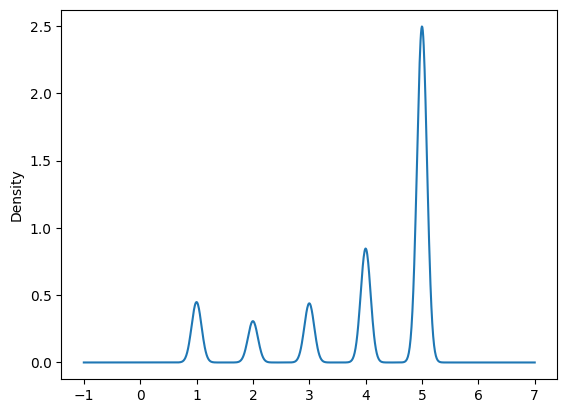

In [22]:
# (ref: https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/)
train_data["overall"].plot(kind="kde");

As you can see from the plot, the dataset is not balanced. Imbalanced data is a common problem in machine learning, where one class has a significantly higher number of observations than the other. This can lead to biased models and poor performance on the minority class.

To handle imbalanced data, various techniques can be employed:
- Resampling techniques
- Data augmentation
- Synthetic minority over-sampling technique (SMOTE)
- Ensemble techniques
- One-class classification
- Cost-sensitive learning
- Evaluation metrics for imbalanced data

The most common techniques include **undersampling**, **oversampling**, and **feature selection**.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      همانطور که از نمودار می‌بینید، مجموعه داده متعادل نیست. داده‌های نامتعادل یک مشکل رایج در یادگیری ماشین هستند، که در آن، یک کلاس، به طور قابل‌توجهی، تعداد مشاهدات بیشتری نسبت به بقیه دارد. این می‌تواند منجر به مدل‌های مغرضانه و ایجاد عملکرد ضعیف در طبقه‌ی اقلیت شود.
    </p>
    <p>
      برای مدیریت داده‌های نامتعادل، می‌توان از تکنیک‌های مختلفی استفاده کرد:
      <ul>
        <li>تکنیک‌های نمونه‌گیری مجدد</li>
        <li>افزایش داده‌ها</li>
        <li>روش نمونه‌برداری بیش از حد از طبقه‌ی اقلیت و بصورت مصنوعی (SMOTE)</li>
        <li>تکنیک‌های آنسامبلی</li>
        <li>طبقه‌بندی یک کلاسه</li>
        <li>یادگیری حساس به هزینه</li>
        <li>معیارهای ارزیابی برای داده‌های نامتعادل</li>
      </ul>
    </p>
    <p>
      رایج‌ترین تکنیک‌ها شامل <u>نمونه‌برداری کم‌نمونه</u>، <u>نمونه‌برداری بیش از حد</u> و <u>انتخاب ویژگی</u> است.
    </p>
  </div>
</details>

In [23]:
# (ref: https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)

# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(train_data.drop('overall', axis=1), train_data['overall'])
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

To manage imbalance data, as specified in the commented code of the cell above, the feature and target must be specified, and since the feature and target are not specified at this stage of the project, only this explanation can answer the question of this section.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      برای مدیریت داده‌های imbalance، همونطوری که در کد کامنت‌شده‌ی سلول بالا مشخص شده است، باید feature و target مشخص باشد و چون در این مرحله از پروژه، feature و target مشخص نیست، تنها در همین حد توضیح می‌توان به سوال این بخش پاسخ داد.
    </p>
  </div>
</details>

### Question 2 <a class="anchor" id="q2"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h3>سوال ۲</h3>
  </div>
</details>

Let's assume that comments whose overall column value is $4$ or $5$ are positive, comments whose value is $3$ are neutral, and comments whose value is $1$ or $2$ are negative. Draw a word cloud for each of these three categories so that you can see the most frequent words in each category. As much as possible, try to include useful information in the obtained super words and there are no stop words between them. Is there a commonality between positive and negative category words? How do you interpret them?

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      فرض کنید نظراتی که مقدار ستون <code>overall</code> آن‌ها $4$ یا $5$ است را همراه با حس مثبت، نظراتی که مقدارشان $3$ است را نظرات خنثی و نظراتی که مقدارشان $1$ یا $2$ است را حس منفی بدانیم. به ازای هرکدام از این سه دسته، یک ابر کلمات (Word Cloud) رسم کنید تا بتوان کلمات پرتکرار هر دسته را مشاهده کرد. تا حد ممکن سعی کنید ابر کلمات بدست‌آمده، شامل اطلاعات مفیدی باشد و کلمات زائد (Stop Words) بین آن‌ها وجود نداشته باشد. آیا اشتراکی بین کلمات دسته‌ی مثبت و منفی وجود داشته است؟ چگونه آن‌ها را تفسیر می‌کنید؟
    </p>
  </div>
</details>

In [24]:
positive_comments = train_data[
    (train_data["overall"] == 4) | (train_data["overall"] == 5)
]["reviewText"]
neural_comments = train_data[train_data["overall"] == 3]["reviewText"]
negative_comments = train_data[
    (train_data["overall"] == 1) | (train_data["overall"] == 2)
]["reviewText"]

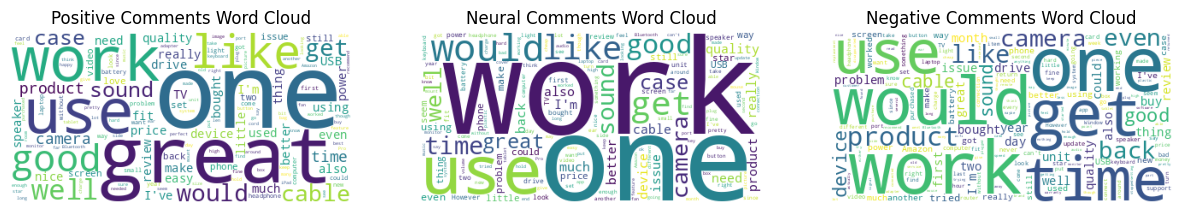

In [25]:
# (ref: https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/)

# creating the text variable
positive_text = " ".join(review_text for review_text in positive_comments)
neural_text = " ".join(review_text for review_text in neural_comments)
negative_text = " ".join(review_text for review_text in negative_comments)

# list of english stop words
# (ref: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python)
stop_words = set(stopwords.words("english"))

# creating word_cloud with text as argument in .generate() method
PositiveComment_WordCloud = WordCloud(
    collocations=False, stopwords=stop_words, background_color="white"
).generate(positive_text)
NeuralComment_WordCloud = WordCloud(
    collocations=False, stopwords=stop_words, background_color="white"
).generate(neural_text)
NegativeComment_WordCloud = WordCloud(
    collocations=False, stopwords=stop_words, background_color="white"
).generate(negative_text)

# display the generated word clouds
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))

ax1.imshow(PositiveComment_WordCloud)
ax2.imshow(NeuralComment_WordCloud)
ax3.imshow(NegativeComment_WordCloud)

ax1.set_title("Positive Comments Word Cloud")
ax2.set_title("Neural Comments Word Cloud")
ax3.set_title("Negative Comments Word Cloud")

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

fig.show()

According to the word clouds above, we notice that the four words ``one``, ``use``, ``work`` and ``will`` are repeated a lot in all three types of comments. Since these comments are comments about electronic goods, it seems logical that these words have been repeated a lot, and it can be interpreted as if all the comments were about the use of electronic devices and their performances. On the other hand, in positive comments, words like ``great``, ``good`` and ``well`` have been repeated a lot, which are positive words to define electronic goods, and words like ``back`` and ``time`` have been repeated a lot in negative comments, which can be interpreted in this way that it may be related to returning the goods.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      طبق ابر کلمات بالا، متوجه می‌شویم که چهار کلمه‌ی <code>One</code>، <code>Work</code>، <code>Use</code> و <code>Will</code> در تمام این سه نوع نظر، زیاد تکرار شده‌اند. از آنجایی که این نظرات، نظراتی درباره‌ی لوازم الکترونیکی هستند، منطقی به نظر می‌رسد که این کلمات زیاد تکرار شده باشند، و می‌توان آن را به گونه‌ای تفسیر کرد، که گویی تمامی نظرات، در مورد استفاده از وسایل الکترونیکی و عملکرد آن‌ها بوده است. از طرف دیگر، در نظرات مثبت، کلماتی مانند <code>great</code>، <code>good</code> و <code>well</code> زیاد تکرار شده‌اند که کلماتی مثبت به منظور تعریف از لوازم الکترونیکی هستند، و کلماتی مانند <code>back</code> و <code>time</code> در نظرات منفی زیاد تکرار شده‌اند، که می‌توان این گونه تعبیر کرد که ممکن است مربوط به بازگرداندن کالا باشد.
    </p>
  </div>
</details>

**Note:** Variables ``positive_comments``, ``neural_comments``, ``negative_comments``, ``positive_text``, ``neural_text``, ``negative_text``, ``PositiveComment_WordCloud``, ``NeuralComment_WordCloud`` and ``NegativeComment_WordCloud`` occupy a large part of RAM space and here due to RAM space limitation and also because we no longer need these variables in future steps. , we remove them from the RAM space.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      <b>نکته:</b> متغیرهای <code>positive_comments</code>، <code>neural_comments</code>، <code>negative_comments</code>، <code>positive_text</code>، <code>neural_text</code>، <code>negative_text</code>، <code>PositiveComment_WordCloud</code>، <code>NeuralComment_WordCloud</code> و <code>NegativeComment_WordCloud</code> بخش زیادی از فضای RAM را اشغال می‌کنند و در اینجا به دلیل محدودیت فضای RAM و همچنین به دلیل اینکه دیگر به این متغیرها در مراحل آینده نیازی نداریم، آن‌ها را از فضای RAM حذف می‌کنیم.
    </p>
  </div>
</details>

In [26]:
del positive_comments
del neural_comments
del negative_comments

del positive_text
del neural_text
del negative_text

del PositiveComment_WordCloud
del NeuralComment_WordCloud
del NegativeComment_WordCloud

### Question 3 <a class="anchor" id="q3"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h3>سوال ۳</h3>
  </div>
</details>

Among the commenters, find the $10$ people whose comments were most useful in total (they had more total votes). Display each person's name and total vote in order.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      از بین نظردهندگان، $10$ نفری که در مجموع، نظراتشان بیشتر مفید واقع شده (مجموع vote بیشتری داشته‌اند) را پیدا کنید. نام هر فرد و مجموع vote آن را به ترتیب نمایش دهید.
    </p>
  </div>
</details>

In [27]:
# Thank you dear Mr. Parsa Abbasi for the guidance in this part :)
train_data.groupby("reviewerName")["vote"].sum().sort_values(ascending=False).head(10)

reviewerName
Amazon Customer    28871.0
Benson Leung        4572.0
Michael             3710.0
Voltron00x          3181.0
Obi Wan             3150.0
Mike                3000.0
nycebo              2978.0
Kindle Customer     2927.0
John                2730.0
Cthulhu             2656.0
Name: vote, dtype: float32

### Question 4 <a class="anchor" id="q4"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h3>سوال ۴</h3>
  </div>
</details>

Plot the histogram of the length of the text (number of characters) of the ``reviewText`` column. Plot once with the original mode and Plot once filtered (do not consider those categories that have a small number of samples and outliers). It is up to you to choose the number of bins and your output plot should be appropriate and readable. Do we need to limit the number of characters during modeling? If yes, what is your suggested range of numbers?

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      هیستوگرام طول متن (تعداد کاراکتر) ستون reviewText را رسم کنید. یک بار با حالت اصلی رسم کنید و یکبار بصورت فیلترشده (آن دسته‌هایی که تعداد نمونه‌های کم و پرتی دارند را در نظر نگیرید) ترسیم کنید. انتخاب تعداد دسته‌ها (bins) برعهده‌ی خودتان است و نمودار خروجی شما باید مناسب و خوانا باشد. آیا نیاز است در هنگام مدل‌سازی، محدودیتی روی تعداد کاراکترها بگذاریم؟ اگر بله، بازه‌ی پیشنهادی شما چه عددهایی است؟
    </p>
  </div>
</details>

In [28]:
def number_of_bins(sample):
    """
    use Freedman–Diaconis rule to calculate optimal number of bins in a histogram
    (ref: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)
    """
    # minimum data in our sample
    minimum_data = np.min(sample)
    # maximum data in our sample
    maximum_data = np.max(sample)

    # 1st quartile
    Q1 = np.quantile(sample, 0.25)
    # 3rd quartile
    Q3 = np.quantile(sample, 0.75)
    # interquartile range
    IQR = Q3 - Q1

    # number of observations in our sample
    n = len(sample)

    # optimal number of bins
    N = int((maximum_data - minimum_data) / (2 * IQR) * np.cbrt(n))

    return N

#### Original Mode <a class="anchor" id="original_mode"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h4>حالت اصلی</h4>
  </div>
</details>

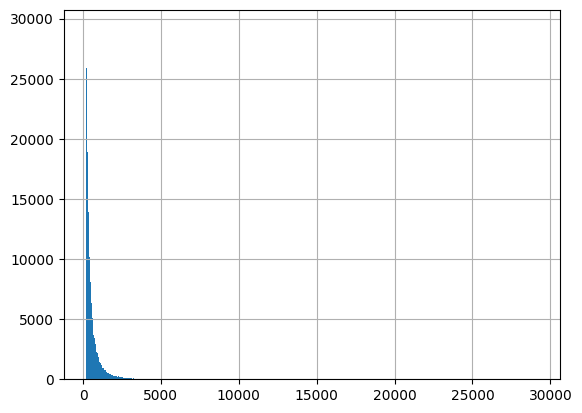

In [29]:
reviewText_lengths = train_data["reviewText"].map(lambda data: len(data))

# (ref: https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html)
reviewText_lengths.hist(bins=number_of_bins(reviewText_lengths));

#### Filtered Mode (Exclude Outlier Data) <a class="anchor" id="filtered_mode_exclude_outlier_data"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h4>حالت فیلترشده (حذف داده‌های پرت)</h4>
  </div>
</details>

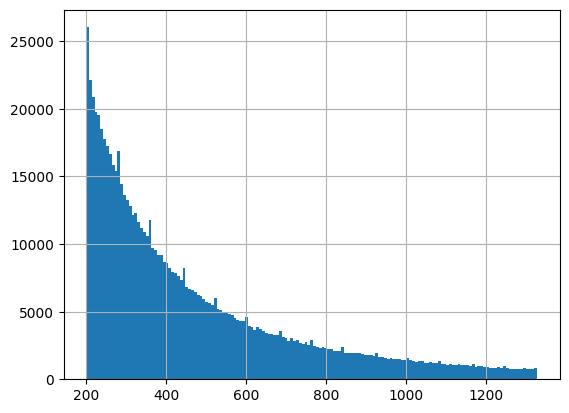

In [30]:
# calculate IQR for column x_HI
Q1 = reviewText_lengths.quantile(0.25)
Q3 = reviewText_lengths.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = reviewText_lengths[
    (reviewText_lengths < Q1 - threshold * IQR)
    | (reviewText_lengths > Q3 + threshold * IQR)
]

# drop rows containing outliers
filtered_reviewText_lengths = reviewText_lengths.drop(outliers.index)

# (ref: https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html)
filtered_reviewText_lengths.hist(bins=number_of_bins(filtered_reviewText_lengths));

As can be seen from the figure above, the number of comments with a high number of characters is very low, and this means that most of the comments given by buyers were short. For this reason, we can ignore these comments, which are very few in number, during modeling. The best thing to do is to exclude the outlier data and use the remaining data.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      همانطور که از شکل بالا مشخص است، تعداد نظرات با تعداد کاراکتر بالا، بسیار کم است و این به این معنی است که اکثر نظرات خریداران، کوتاه بوده است. به همین دلیل می‌توانیم در طول مدل‌سازی، از این نظرات که تعدادشان بسیار کم است چشم‌پوشی کنیم. بهترین کار این است که داده‌های پرت را حذف کنیم و از داده‌های باقی‌مانده استفاده کنیم.
    </p>
  </div>
</details>

**Note:** Due to RAM space limitations, and also because we do not need ``reviewText_lengths``, ``Q1``, ``Q3``, ``IQR``, ``threshold``, ``outliers`` and ``filtered_reviewText_lengths`` variables in the future, we remove these variables from RAM space.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      <b>نکته:</b> به دلیل داشتن محدودیت در فضای RAM، و همچنین به دلیل اینکه به متغیرهای <code>reviewText_lengths</code>، <code>Q1</code>، <code>Q3</code>، <code>IQR</code>، <code>threshold</code>، <code>outliers</code> و <code>filtered_reviewText_lengths</code> در آینده نیازی نداریم، این متغیرها را از فضای RAM حذف می‌کنیم.
    </p>
  </div>
</details>

In [31]:
del reviewText_lengths

del Q1
del Q3
del IQR

del threshold
del outliers

del filtered_reviewText_lengths

### Question 5 <a class="anchor" id="q5"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h3>سوال ۵</h3>
  </div>
</details>

Which products have the most $5$ points? Display the top $10$ items in a table including ``brand name``, ``product title`` and ``number of comments`` with a score of $5$.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      کدام محصولات، بیشترین امتیاز $5$ را کسب کرده‌اند؟ $10$ مورد برتر را به ترتیب بصورت یک جدول شامل نام برند، عنوان محصول و تعداد نظرات با امتیاز $5$ نمایش دهید.
    </p>
  </div>
</details>

In [32]:
# merge train_data and title_brand in a second data set named merged_data
merged_data = pd.merge(train_data, title_brand, on="asin")

data = (
    merged_data[merged_data["overall"] == 5]
    .groupby("asin")["overall"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
data = title_brand[title_brand.index.isin(data.values)].iloc[::-1].reset_index()
data.rename({"index": "#overall 5"}, axis=1).drop(columns=["asin"]).iloc[:, ::-1]

,brand,title,#overall 5
0,NETGEAR,"Netgear DGN1000, N150 wireless ADSL2+ modem ro...",1163
1,Nova Development,Nova Development FKWT Photo Explosion Deluxe 4.0,659
2,Visit Amazon's Jason Clemens Page,Piper Cherokee 140 PA-28-140 Qref Book,600
3,Visit Amazon's Bridgette Doremire Page,Garmin GPSMAP 296 Qref Checklist (Qref Avionic...,598
4,Albert Einstein,Ultimate Einstein C/Win/Ww,552
5,i-clicker,Iclicker+ Student Remote,529
6,Visit Amazon's V. L. Green Page,When Destinies Meet,482
7,Barnes &amp; Noble,Barnes and Noble NOOK eBook Reader (WiFi only)...,471
8,Orange Sources,Orange Sources 12 Volt Security Systems Alarm ...,448
9,Kingston,Professional Kingston 4GB MicroSDHC Card for G...,433


### Question 6 <a class="anchor" id="q6"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h3>سوال ۶</h3>
  </div>
</details>

First, find the $10$ brands that have the most comments. Then calculate the average score of each and display a table including the brand name and its average score in order of average score.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      ابتدا $10$ برندی که بیشترین تعداد نظر را داشته‌اند پیدا کنید. سپس میانگین امتیاز هرکدام را محاسبه کرده و یک جدول شامل نام برند و میانگین امتیاز آن، به ترتیب میانگین امتیاز نمایش دهید.
    </p>
  </div>
</details>

In [33]:
# calculate top 10 brands based on number of comments
top10brands = (
    merged_data.groupby("brand")["overall"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
# show the top 10 brands with its number of comments
top10brands

brand
Logitech        17066
Samsung         15409
AmazonBasics    13213
Sony            12436
Asus            11928
Anker            9860
TP-LINK          9773
SanDisk          8400
Sabrent          7320
NETGEAR          7085
Name: overall, dtype: int64

In [34]:
# calculate the average score for each of top 10 brands
merged_data[merged_data["brand"].isin(top10brands.index)].groupby("brand")[
    "overall"
].mean().sort_values(ascending=False)

brand
Anker           4.244320
AmazonBasics    4.201468
Sabrent         4.028005
SanDisk         3.958810
Logitech        3.954061
Samsung         3.941268
Sony            3.938726
TP-LINK         3.928681
Asus            3.855550
NETGEAR         3.836274
Name: overall, dtype: float64

## Part 2) The Level of Satisfaction with a Particular Aspect <a class="anchor" id="the_level_of_satisfaction_with_a_particular_aspect"></a> [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>بخش ۲) میزان رضایت از یک جنبه‌ی مشخص</h2>
  </div>
</details>

### Approach 1 (``word2vec``) [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>رویکرد ۱ (<code>word2vec</code>)</h2>
  </div>
</details>

In [35]:
# (ref: https://okan.cloud/posts/2022-05-02-text-vectorization-using-python-word2vec/)

# Tokenize the comments
all_comments = train_data["reviewText"].apply(gensim.utils.simple_preprocess)

# Model parameters
model = gensim.models.Word2Vec(window=5, min_count=2, workers=4, sg=0)

# Train the model
model.build_vocab(all_comments, progress_per=1000)
model.train(all_comments, total_examples=model.corpus_count, epochs=model.epochs)

(345170196, 452579780)

**Parameters used in ``Word2Vec`` function**

- ``window``: Maximum distance between the current and predicted word within a sentence.
- ``min_count``: Ignores all words with total frequency lower than this.
- ``workers``: Use these many worker threads to train the model
- ``sg``: Training algorithm: $1$ for ``skip-gram`` and $0$ for ``CBOW``. (Here we use ``CBOW`` [<a href="https://www.baeldung.com/cs/word-embeddings-cbow-vs-skip-gram">ref</a>])

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      <b>پارامترهای به‌کاررفته در تابع <code>Word2Vec</code></b>
      <ul>
        <li><code>window</code>: حداکثر فاصله بین کلمه‌ی فعلی و پیش‌بینی‌شده در یک جمله.</li>
        <li><code>min_count</code>: همه‌ی کلمات با تعداد تکرار کل کمتر از این را نادیده می‌گیرد.</li>
        <li><code>workers</code>: از این تعداد زیاد worker threads برای آموزش مدل استفاده می‌کند.</li>
        <li><code>sg</code>: الگوریتم آموزشی - ۱ برای <code>skip-gram</code> و ۰ برای <code>CBOW</code>. (در اینجا ما از <code>CBOW</code> استفاده می‌کنیم <a href="https://www.baeldung.com/cs/word-embeddings-cbow-vs-skip-gram">[منبع]</a>)</li>
      </ul>
    </p>
  </div>
</details>

In [36]:
# model.wv.most_similar("warranty", topn=20)

In [37]:
# model.wv.most_similar("guarantee", topn=20)

By examining the trained model, we found that the closest word to the word ``guarantee`` is the word ``guaranty`` with a similarity percentage of $69$, and the closest word to the word ``warranty`` is the word ``warrantee`` with a similarity percentage of $92$. In this approach, we select words that have a similarity percentage above $60$ to each of these two words for search.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      با بررسی مدل آموزش‌دیده، متوجه شدیم که نزدیک‌ترین کلمه به کلمه‌ی <code>guarantee</code>، کلمه‌ی <code>guaranty</code> با درصد شباهت ۶۹ است و نزدیک‌ترین کلمه به کلمه‌ی <code>warranty</code>، کلمه‌ی <code>warrantee</code> با درصد شباهت ۹۲ است. در این رویکرد، ما کلماتی را که درصد شباهت بالای ۶۰ به هرکدام از این دو کلمه را داشته باشند، برای جستجو انتخاب می‌کنیم.
    </p>
  </div>
</details>

In [38]:
# (ref: https://stackoverflow.com/questions/10735282/python-get-list-of-tuples-first-index)

# guarantee most similar words with similiarty percentage above 60
guarantee_msw = set(list(zip(*model.wv.most_similar("guarantee", topn=10)))[0])
# warranty most similar words with similiarty percentage above 60
warranty_msw = set(list(zip(*model.wv.most_similar("warranty", topn=12)))[0])

# union of guarantee_msw and warranty_msw
words = guarantee_msw.union(warranty_msw)

In [39]:
row_indexes = []
for row in train_data.iterrows():
    if any(word in row[1]["reviewText"] for word in words):
        row_indexes.append(row[0])

In [40]:
train_data.iloc[row_indexes, :].groupby("asin")["overall"].mean().sort_values(
    ascending=False
)

asin
B01HJDR9DQ    5.0
B00HVT2D4Y    5.0
B017VWYC1C    5.0
B00I6CVPT4    5.0
B017W72TG6    5.0
             ... 
B0185C5Y0U    1.0
B00HZA6E8K    1.0
B00HZA6DM2    1.0
B00HXT8SJG    1.0
B00R8KBLUS    1.0
Name: overall, Length: 13655, dtype: float64

### Approach 2 (``edit_distance``) [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>رویکرد ۲ (<code>edit_distance</code>)</h2>
  </div>
</details>

In the previous approach, each word is converted into a vector based on the words before and after it and the sentence in which it is used, and the similarity of the vectors is measured. But in this approach, both words are measured together based on the letters used in them, and the difference between the two words is returned. In the previous method, words such as ``warranty`` and ``warrantty``, which are very similar in spelling, had a low similarity percentage of $29\%$, but in this method, the difference between these two words is $1$, which shows how close these two words are in terms of spelling.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در رویکرد قبلی، هر کلمه بر اساس کلمات قبل و بعدش و جمله‌ای که در آن به کار رفته تبدیل به بردار شده، و شباهت بردارها با هم سنجیده می‌شوند. اما در این رویکرد هر دو کلمه بر اساس حروف به کار رفته در آن‌ها با هم سنجیده می‌شوند و اختلاف بین دو کلمه برگردانده می‌شود. در روش قبلی، کلماتی مانند <code>warranty</code> و <code>warrantty</code> که شباهت املایی زیادی با هم دارند، درصد شباهت کم ۲۹ درصد با یکدیگر داشتند، اما در این روش، اختلاف این دو کلمه ۱ است که نشان می‌دهد این دو کلمه چقدر از نظر املایی نزدیک به یکدیگر هستند.
    </p>
  </div>
</details>

In [41]:
# (ref: https://datascience.stackexchange.com/questions/12575/similarity-between-two-words)
nltk.edit_distance("warranty", "warrantty")

1

Here we consider up to the maximum difference of $3$ in our calculations and due to the low computational cost, we only examine the first $10000$ words obtained from the Word2Vec model.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      در اینجا ما تا حداکثر اختلاف ۳ را در محاسبات خود نظر می‌گیریم و به دلیل زیادنشدن هزینه‌ی محاسباتی، تنها ۱۰۰۰۰ کلمه ی اولی که از مدل <code>word2vec</code> بدست آمد را بررسی می‌کنیم.
    </p>
  </div>
</details>

In [42]:
words = []
for word in list(zip(*model.wv.most_similar("guarantee", topn=10000)))[0]:
    if nltk.edit_distance("guarantee", word) <= 3:
        words.append(word)

for word in list(zip(*model.wv.most_similar("warranty", topn=10000)))[0]:
    if nltk.edit_distance("warranty", word) <= 3:
        words.append(word)

words = list(set(words))

In [43]:
row_indexes = []
for row in train_data.iterrows():
    if any(word in row[1]["reviewText"] for word in words):
        row_indexes.append(row[0])

In [44]:
train_data.iloc[row_indexes, :].groupby("asin")["overall"].mean().sort_values(
    ascending=False
)

asin
9800466657    5.0
B00S7YA5FQ    5.0
B00S9SGMZM    5.0
B00S9O476W    5.0
B00S99Z68A    5.0
             ... 
B0115ZHH68    1.0
B009F1DYF8    1.0
B009EPP4CG    1.0
B019GZ24R6    1.0
B00L1QH8KC    1.0
Name: overall, Length: 9814, dtype: float64

**Note:** The variables ``all_comments``, ``model``, ``guarantee_msw``, ``warranty_msw``, ``words`` and ``row_indexes`` that are defined in the cells above occupy a large part of RAM space and again due to the limitation of RAM space and the fact that we no longer need these variables in the next steps, we remove them from the RAM space.

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <p>
      <b>نکته:</b> متغیرهای <code>all_comments</code>، <code>model</code>، <code>guarantee_msw</code>، <code>warranty_msw</code>، <code>words</code> و <code>row_indexes</code> که در سلول‌های بالا تعریف شده‌اند، بخش زیادی از فضای RAM را اشغال کرده‌اند و دوباره به دلیل محدودیت در فضای RAM و اینکه دیگر به این متغیرها در مراحل بعدی نیازی نداریم، آن‌ها را از فضای RAM حذف می‌کنیم.
    </p>
  </div>
</details>

In [45]:
del all_comments
del model

del guarantee_msw
del warranty_msw

del words
del row_indexes

## Part 3) Sentiment Analysis Model [&#11014;](#scrollTo=a7xw-0lsoDXC)

<details>
  <summary>
      <font size='3', color='darkgreen'><b>Translation</b></font>
  </summary>

  <div dir=rtl>
    <h2>مدل تحلیل احساسات</h2>
  </div>
</details>

In [46]:
# https://www.analyticsvidhya.com/blog/2022/03/building-naive-bayes-classifier-from-scratch-to-perform-sentiment-analysis/

stop_words = set(stopwords.words("english"))

data = train_data.loc[:100000, ["reviewText", "overall"]]

data["reviewText"] = data["reviewText"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop_words)])
)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st


data["reviewText"] = data["reviewText"].apply(lemmatize_text)

X_train, X_val, y_train, y_val = train_test_split(
    data["reviewText"], data["overall"], stratify=data["overall"]
)

vec = CountVectorizer(max_features=3000)
X = vec.fit_transform(X_train)
vocab = vec.get_feature_names_out()
X = X.toarray()
word_counts = {}
for l in range(1, 6):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = y_train.reset_index(drop=True)[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]


def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return np.log(a / b)


def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data


def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = np.log(n_label_items[l] / n)
    return n_label_items, log_label_priors


def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab:
                continue
            for l in labels:
                log_w_given_l = laplace_smoothing(
                    n_label_items, vocab, word_counts, word, l
                )
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result


labels = [1, 2, 3, 4, 5]
n_label_items, log_label_priors = fit(X_train, y_train, labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, X_val)
print("Accuracy of prediction on validation set:", accuracy_score(y_val, pred))

KeyError: ignored

In [ ]:
import nltk

nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    filtered_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
    ]
    return " ".join(filtered_tokens)


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train, X_val, y_train, y_val = train_test_split(
    train_data["reviewText"], train_data["overall"], stratify=train_data["overall"]
)

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))
print("Precision: ", precision_score(y_val, y_pred, average="weighted"))
print("Recall: ", recall_score(y_val, y_pred, average="weighted"))
print("F1-score: ", f1_score(y_val, y_pred))